In [36]:
!pip install pmdarima

In [37]:
#Import needed libraries
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

In [39]:
# read the Weekly_EoP sheet from Price file (befree67, Hayden)
df = pd.read_excel(r'C:\Users\Saemi\OneDrive\Education\WGU\D214 Data Analyticis Graduate Capstone\Prices.xlsx', 
                   sheet_name='Weekly_EoP', skiprows=5)
# check the data information
df.shape

(2396, 22)

In [40]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,USD,EUR,JPY,GBP,CAD,CHF,INR,...,SAR,IDR,AED,THB,VND,EGP,KRW,RUB,ZAR,AUD
0,NaN,NaN,1978-12-29,226.00,137.06,NaN,110.70,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1979-01-05,225.50,138.35,44582.47,111.63,268.39,373.72,1843.57,...,756.42,142069.10,875.38,4580.57,NaN,NaN,110510.44,NaN,196.40,197.94
2,NaN,NaN,1979-01-12,217.60,134.08,42837.13,109.02,257.19,364.62,1782.62,...,727.06,137371.81,842.09,4429.12,NaN,NaN,106856.59,NaN,187.08,189.80
3,NaN,NaN,1979-01-19,230.55,141.14,46908.77,115.07,280.94,396.08,1940.75,...,782.11,147159.35,899.07,4764.43,NaN,NaN,116335.53,NaN,206.50,207.64
4,NaN,NaN,1979-01-26,235.45,144.64,46801.30,118.02,279.57,394.61,1929.26,...,782.17,146687.14,899.62,4752.94,NaN,NaN,115646.54,NaN,204.26,205.97


In [41]:
df.columns=['col1', 'col2', 'Date', 'USD', 'EUR', 'JPY', 'GBP', 'CAD', 'CHF', 'INR', 'CNY', 'TRY', 'SAR', 'IDR', 'AED', 'THB', 'VND', 'EGP', 'KRW', 'RUB', 'ZAR', 'AUD']
df.head()

,col1,col2,Date,USD,EUR,JPY,GBP,CAD,CHF,INR,...,SAR,IDR,AED,THB,VND,EGP,KRW,RUB,ZAR,AUD
0,NaN,NaN,1978-12-29,226.00,137.06,NaN,110.70,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1979-01-05,225.50,138.35,44582.47,111.63,268.39,373.72,1843.57,...,756.42,142069.10,875.38,4580.57,NaN,NaN,110510.44,NaN,196.40,197.94
2,NaN,NaN,1979-01-12,217.60,134.08,42837.13,109.02,257.19,364.62,1782.62,...,727.06,137371.81,842.09,4429.12,NaN,NaN,106856.59,NaN,187.08,189.80
3,NaN,NaN,1979-01-19,230.55,141.14,46908.77,115.07,280.94,396.08,1940.75,...,782.11,147159.35,899.07,4764.43,NaN,NaN,116335.53,NaN,206.50,207.64
4,NaN,NaN,1979-01-26,235.45,144.64,46801.30,118.02,279.57,394.61,1929.26,...,782.17,146687.14,899.62,4752.94,NaN,NaN,115646.54,NaN,204.26,205.97


In [42]:
#Select 'Date' and 'USD' columns only
df2 = df[['Date', 'USD']]
df2.head()

,Date,USD
0,1978-12-29,226.00
1,1979-01-05,225.50
2,1979-01-12,217.60
3,1979-01-19,230.55
4,1979-01-26,235.45


In [43]:
df2.isnull().any()

Date    False
USD     False
dtype: bool

In [44]:
cleaned_df = df2.dropna()

In [45]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2396 entries, 0 to 2395
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2396 non-null   datetime64[ns]
 1   USD     2396 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 37.6 KB


In [46]:
cleaned_df.describe()

,Date,USD
count,2396,2396.000000
mean,2001-12-10 12:00:00.000000128,787.151920
min,1978-12-29 00:00:00,217.600000
25%,1990-06-20 06:00:00,357.787500
50%,2001-12-10 12:00:00,434.125000
75%,2013-06-01 18:00:00,1250.737500
max,2024-11-22 00:00:00,2744.300000
std,NaN,571.971081


In [47]:
#Set the Date as an index
cleaned_df.set_index('Date', inplace=True)
cleaned_df

,USD
Date,
1978-12-29,226.00
1979-01-05,225.50
1979-01-12,217.60
1979-01-19,230.55
1979-01-26,235.45
...,...
2024-10-25,2731.45
2024-11-01,2744.30
2024-11-08,2691.15


In [48]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2396 entries, 1978-12-29 to 2024-11-22
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   USD     2396 non-null   float64
dtypes: float64(1)
memory usage: 37.4 KB


In [49]:
#Save the cleaned datset
cleaned_df.to_csv('cleaned_data.csv')

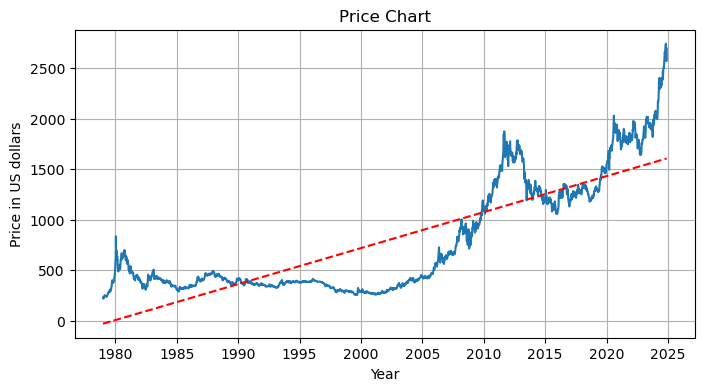

In [50]:
#Visualize the data
plt.figure(figsize=(8,4))
plt.plot(cleaned_df.USD)
plt.title('Price Chart')
plt.xlabel('Year')
plt.ylabel('Price in US dollars')

#Generate trend line
x = mdates.date2num(cleaned_df.index)
y = cleaned_df.USD
z = np.polyfit(x,y,1)
p = np.poly1d(z)

plt.plot(x, p(x), "r--")
plt.grid(True)
plt.show()

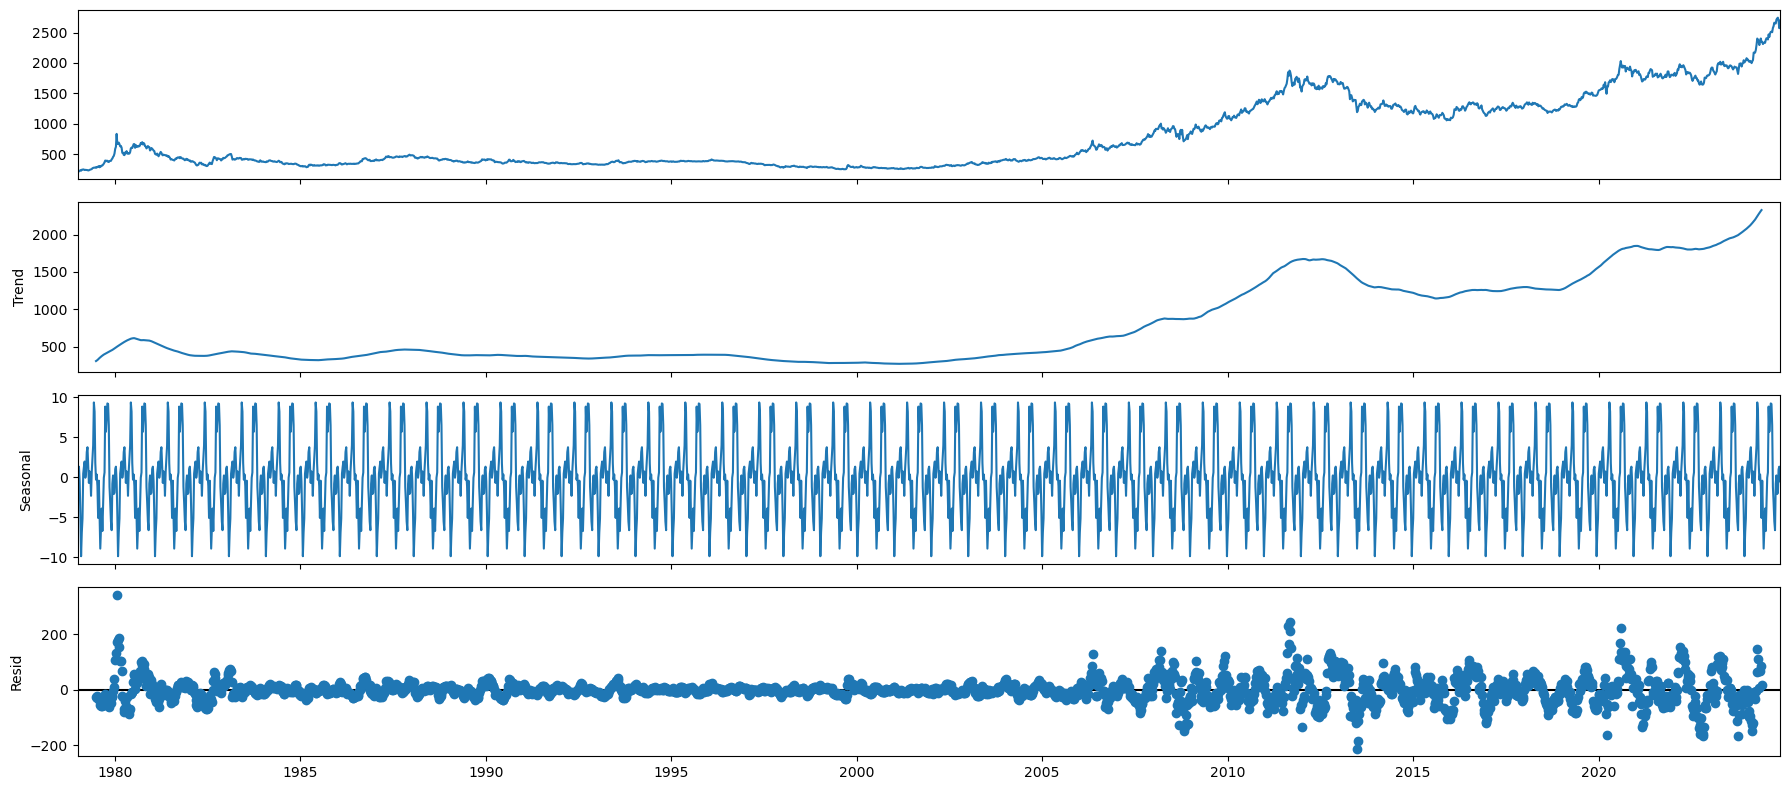

In [51]:
#visualize the data using the seasonal_decomposition with 3 different 
#components including trend, seasonal, and residual (Li)
rcParams['figure.figsize'] = 18, 8
decomposition = seasonal_decompose(cleaned_df, model='additive')
fig = decomposition.plot()
plt.show()

In [52]:
#Splitting the data to train and test sets
train = cleaned_df.loc[:'2020-12-25']
test = cleaned_df.loc['2021-01-01':]
print('Training Set: ', train.shape)
print('Test Set: ', test.shape)

Training Set:  (2192, 1)
Test Set:  (204, 1)


In [53]:
#Save the train & test datset
train.to_csv('train_data.csv')
test.to_csv('test_data.csv')

In [54]:
#Find the best model using auto-ARIMA
model = auto_arima(train['USD'], trace=True, suppress_warnings=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=19546.673, Time=1.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=19545.677, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=19542.230, Time=0.29 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=19542.297, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=19546.511, Time=0.20 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=19544.180, Time=0.31 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=19544.191, Time=0.59 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=19545.003, Time=0.81 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=19543.359, Time=0.26 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 4.513 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2192
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -9768.115
Date:                Mon, 09 Dec 2024   

In [55]:
model = ARIMA(train, order=(1,1,0))
results = model.fit()
results.summary()

C:\Users\Saemi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Saemi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Saemi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    USD   No. Observations:                 2192
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -9769.679
Date:                Mon, 09 Dec 2024   AIC                          19543.359
Time:                        21:27:11   BIC                          19554.743
Sample:                    12-29-1978   HQIC                         19547.520
                         - 12-25-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0484      0.008     -5.769      0.000      -0.065      -0.032
sigma2       437.2848      4.925     88.784      0.000     427.631     446.938
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             14529.25
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               3.87   Skew:                             0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

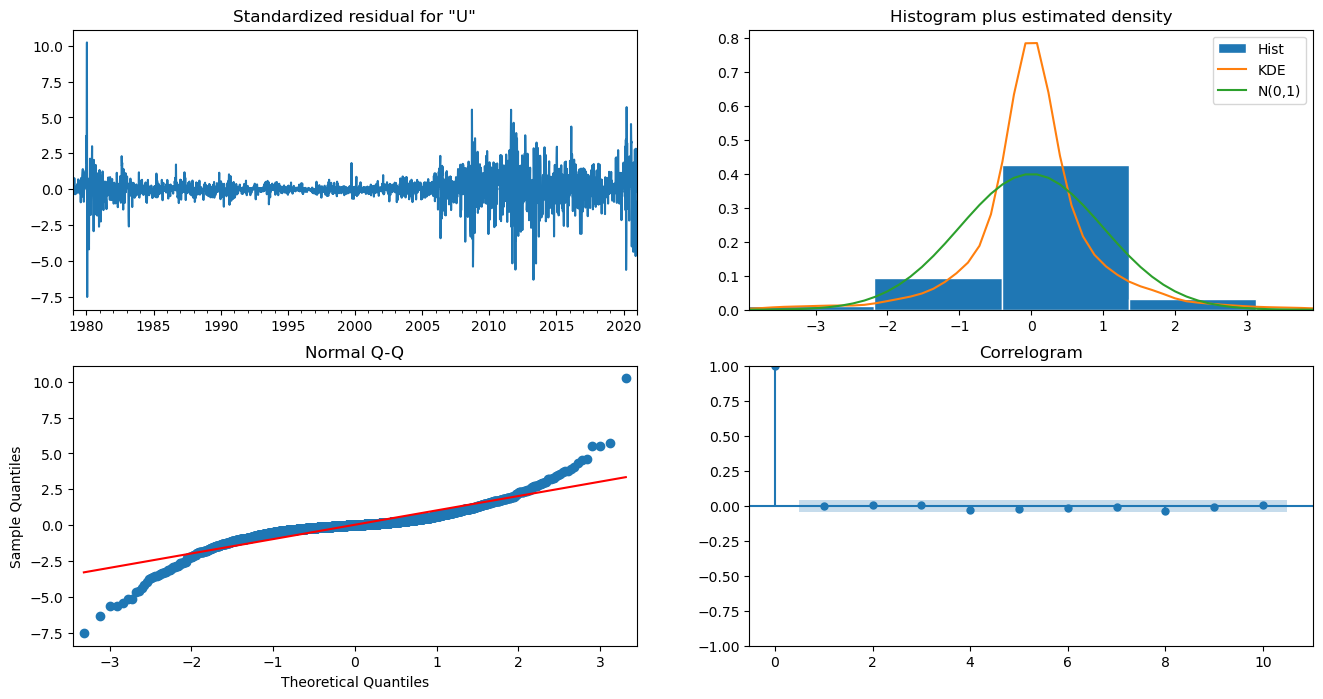

In [56]:
#run model diagnostics to investigate any unusual behaviors
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [57]:
#Make out of Sample Forecast
results.forecast(204)

2021-01-01    1875.230096
2021-01-08    1875.218950
2021-01-15    1875.219490
2021-01-22    1875.219463
2021-01-29    1875.219465
                 ...     
2024-10-25    1875.219465
2024-11-01    1875.219465
2024-11-08    1875.219465
2024-11-15    1875.219465
2024-11-22    1875.219465
Freq: W-FRI, Name: predicted_mean, Length: 204, dtype: float64

In [58]:
#Create future dates after the dataset
index_future_dates = pd.date_range(start='2021-01-01', end='2024-11-22', freq='W-FRI')
print(index_future_dates)

DatetimeIndex(['2021-01-01', '2021-01-08', '2021-01-15', '2021-01-22',
               '2021-01-29', '2021-02-05', '2021-02-12', '2021-02-19',
               '2021-02-26', '2021-03-05',
               ...
               '2024-09-20', '2024-09-27', '2024-10-04', '2024-10-11',
               '2024-10-18', '2024-10-25', '2024-11-01', '2024-11-08',
               '2024-11-15', '2024-11-22'],
              dtype='datetime64[ns]', length=204, freq='W-FRI')


In [59]:
pred = results.predict(start=len(train), end=len(train)+203, typ='levels')
pred.index = index_future_dates
pred.head()

C:\Users\Saemi\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


2021-01-01    1875.230096
2021-01-08    1875.218950
2021-01-15    1875.219490
2021-01-22    1875.219463
2021-01-29    1875.219465
Freq: W-FRI, Name: predicted_mean, dtype: float64

In [60]:
prediction = pd.DataFrame(pred, index=test.index)
prediction.columns=['USD']
prediction.head()

,USD
Date,
2021-01-01,1875.230096
2021-01-08,1875.218950
2021-01-15,1875.219490
2021-01-22,1875.219463
2021-01-29,1875.219465


In [61]:
#cut cleaned_df from 2000-01-07
cleaned_df2 = cleaned_df.loc['2000-01-07':]
cleaned_df2.head()

,USD
Date,
2000-01-07,282.10
2000-01-14,283.30
2000-01-21,287.75
2000-01-28,286.75
2000-02-04,293.65


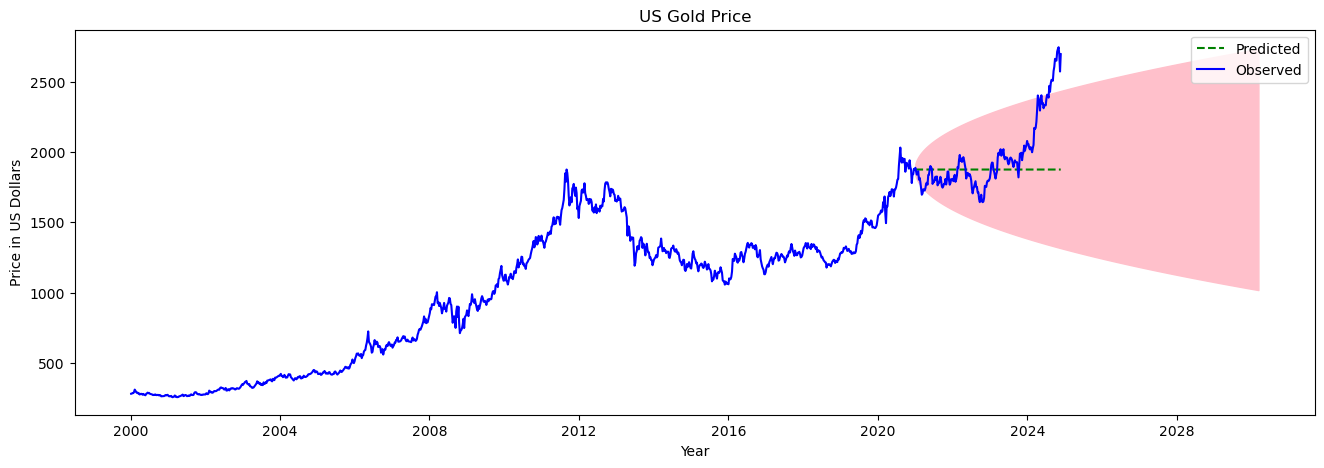

In [62]:
diff_forecast = results.get_forecast(steps=480)
#mean_forecast = diff_forecast.predicted_mean
#Get confidence intervals of predictions
confidence_intervals = diff_forecast.conf_int()
#Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower USD']
upper_limits = confidence_intervals.loc[:,'upper USD']

#Plot the original price and the prediction
plt.figure(figsize = [16,5])
plt.title("US Gold Price")
plt.xlabel("Year")
plt.ylabel("Price in US Dollars")
plt.plot(pred, color = 'green', linestyle = 'dashed')
plt.plot(cleaned_df2, color = 'blue')
plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink')
plt.legend(['Predicted', 'Observed'])
plt.show();

In [63]:
#calculate rmse
expected = test['USD']
predictions = prediction['USD']

rmse = np.sqrt(mean_squared_error(expected, predictions))
print('RMSE: %f' %rmse)

RMSE: 273.335489


In [64]:
#calculate rmspe (Blueberrypudding85)
rmspe = (np.sqrt(np.mean(np.square((test - prediction) / test)))) * 100
print('RMSPE: %f' %rmspe + '%')
accuracy = 100-rmspe
print('Accuracy is %f' %accuracy + '%')

RMSPE: 11.420910%
Accuracy is 88.579090%
